# Descriptive Statistics with `R` Exercises

Like last week, all of the concepts in the exercise will be familiar in the sense that it will mirror the concepts that we learned throughout the labs and practices. This includes the concepts that we worked through in module 1.

There could be multiple ways to solve a single answer, some more elegant than others. Revisit older notebooks for guidance, ask questions along the way, and don't be afraid to search the internet. Chances are that someone has had the same/similar issue.

For this exercise, we will be working with the `congress-terms.csv`. 
Again, this is in the `/dsa/data/all_datasets/` directory.

**Exercise 1**: *Read in the `congress-terms.csv` file and name it `df`.*

In [1]:
## I like the functionality of dplyr
suppressMessages(library(dplyr))

In [2]:
# Exercise 1 code goes here
# -------------------------

df <- read.csv('/dsa/data/all_datasets/congress-terms.csv')

head(df)


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,M000112,Joseph,Jefferson,Mansfield,,1861-02-09,TX,D,Yes,1/3/47,85.9
80,house,D000448,Robert,Lee,Doughton,,1863-11-07,NC,D,Yes,1/3/47,83.2
80,house,S000001,Adolph,Joachim,Sabath,,1866-04-04,IL,D,Yes,1/3/47,80.7
80,house,E000023,Charles,Aubrey,Eaton,,1868-03-29,NJ,R,Yes,1/3/47,78.8
80,house,L000296,William,,Lewis,,1868-09-22,KY,R,No,1/3/47,78.3
80,house,G000017,James,A.,Gallagher,,1869-01-16,PA,R,No,1/3/47,78.0


**Exercise 2**: On average, does the house or the senate have older members? What statistics could you use to find this?

In [3]:
# Exercise 2 code goes here
# -------------------------

df %>%
    group_by(chamber) %>%
    summarise(age.mean = mean(age))

df %>%
    group_by(chamber) %>%
    summarise(age.median = median(age))


chamber,age.mean
<fct>,<dbl>
house,52.36661
senate,57.33553


chamber,age.median
<fct>,<dbl>
house,52.0
senate,56.8


**Exercise 3**: Who is the oldest person in this dataset? The youngest?

In [4]:
# Exercise 3 code goes here
# -------------------------

df %>%
    filter(age == max(age))

df %>%
    filter(age == min(age))


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
107,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,R,Yes,1/3/01,98.1


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
89,house,J000151,Jed,Joseph,Johnson,Jr.,12/27/39,OK,D,No,1/4/65,25


**Exercise 4**: Who is the oldest and youngest person per political party?

In [5]:
# Exercise 4 code goes here
# -------------------------

df %>%
    group_by(party) %>%
    filter(age == max(age))

df %>%
    group_by(party) %>%
    filter(age == min(age))


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
81,house,M000122,Vito,Anthony,Marcantonio,,1902-12-10,NY,AL,Yes,1/3/49,46.1
81,house,R000425,Franklin,Delano,Roosevelt,Jr.,8/17/14,NY,L,No,1/3/49,34.4
107,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,R,Yes,1/3/01,98.1
111,senate,L000304,Joseph,I.,Lieberman,,2/24/42,CT,ID,Yes,1/6/09,66.9
111,senate,B001210,Robert,C.,Byrd,,11/19/13,WV,D,Yes,1/6/09,95.1
113,senate,S000033,Bernard,,Sanders,,9/8/41,VT,I,Yes,1/3/13,71.3


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
80,house,I000046,Leo,,Isacson,,4/20/10,NY,AL,No,1/3/47,36.7
81,house,R000425,Franklin,Delano,Roosevelt,Jr.,8/17/14,NY,L,No,1/3/49,34.4
86,house,A000105,Thomas,Dale,Alford,,1/28/16,AR,ID,No,1/7/59,42.9
88,senate,M000851,Walter,Frederick,Mondale,,1/5/28,MN,I,No,1/9/63,35.0
89,house,J000151,Jed,Joseph,Johnson,Jr.,12/27/39,OK,D,No,1/4/65,25.0
94,house,E000175,David,Farnham,Emery,,9/1/48,ME,R,No,1/14/75,26.4
107,house,P000586,Adam,H.,Putnam,,7/31/74,FL,R,No,1/3/01,26.4


There is a column in this data frame called `bioguide`. This is a unique id for each individual in the data set. As you are probably aware, many politicians have multiple terms.

**Exercise 5**: Who is the politician with the most terms?

In [6]:
# Exercise 5 code goes here
# -------------------------

df %>%
    group_by(bioguide) %>%
    tally() %>% arrange(desc(n)) %>% head(1)

## second way to find this since above using tally() does not return the name but just the bioguide

df %>%
    group_by(bioguide) %>%
    mutate(count = n()) %>% arrange(desc(count)) %>% head(1)


bioguide,n
<fct>,<int>
D000355,30


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,count
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
84,house,D000355,John,D.,Dingell,,7/8/26,MI,D,No,1/5/55,28.5,30


**Exercise 6**: Who has had the most Senate terms? House terms?

In [8]:
# Exercise 6 code goes here
# -------------------------

df %>% 
    group_by(chamber, bioguide) %>%
    mutate(count = n()) %>%
    distinct(bioguide, .keep_all = TRUE) %>% arrange(count) %>% tail()

## Will search for a better way, but this at least gets to the correct answer


congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,count
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
87,senate,K000105,Edward,M.,Kennedy,,2/22/32,MA,D,No,1/3/61,28.9,25
88,senate,I000025,Daniel,K.,Inouye,,9/7/24,HI,D,Yes,1/9/63,38.3,25
89,house,C000714,John,,Conyers,Jr.,5/16/29,MI,D,No,1/4/65,35.6,25
83,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,D,No,1/3/53,50.1,26
86,senate,B001210,Robert,C.,Byrd,,11/20/17,WV,D,Yes,1/7/59,41.1,26
84,house,D000355,John,D.,Dingell,,7/8/26,MI,D,No,1/5/55,28.5,30


In [13]:
df %>% filter(chamber == 'house') %>%
    group_by(bioguide) %>% mutate(terms = n()) %>% distinct(bioguide, .keep_all = TRUE) %>%
    arrange(desc(terms))

Warning message in FUN(X[[i]], ...):
“input string 6 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 6 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 6 is invalid in this locale”ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 6 is invalid in this locale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop(

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,terms
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
84,house,D000355,John,D.,Dingell,,7/8/26,MI,D,No,1/5/55,28.5,30
89,house,C000714,John,,Conyers,Jr.,5/16/29,MI,D,No,1/4/65,35.6,25
80,house,W000428,Jamie,Lloyd,Whitten,,4/18/10,MS,D,Yes,1/3/47,36.7,24
81,house,Y000013,Sidney,Richard,Yates,,8/27/09,IL,D,No,1/3/49,39.4,24
81,house,B000371,Charles,Edward,Bennett,,12/2/10,FL,D,No,1/3/49,38.1,22
92,house,R000053,Charles,B.,Rangel,,6/11/30,NY,D,No,1/21/71,40.6,22
92,house,Y000031,C.,W. Bill,Young,,12/16/30,FL,R,No,1/21/71,40.1,22
80,house,P000522,Charles,Melvin,Price,,1/1/05,IL,D,Yes,1/3/47,42.0,21
83,house,N000009,William,Huston,Natcher,,9/11/09,KY,D,No,1/3/53,43.3,21


In [14]:
df %>% filter(chamber == 'senate') %>%
    group_by(bioguide) %>% mutate(terms = n()) %>% distinct(bioguide, .keep_all = TRUE) %>%
    arrange(desc(terms))

congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,terms
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>
83,senate,T000254,J.,Strom,Thurmond,,1902-12-05,SC,D,No,1/3/53,50.1,26
86,senate,B001210,Robert,C.,Byrd,,11/20/17,WV,D,Yes,1/7/59,41.1,26
87,senate,K000105,Edward,M.,Kennedy,,2/22/32,MA,D,No,1/3/61,28.9,25
88,senate,I000025,Daniel,K.,Inouye,,9/7/24,HI,D,Yes,1/9/63,38.3,25
80,senate,S000852,John,Cornelius,Stennis,,1901-08-03,MS,D,No,1/3/47,45.4,21
90,senate,S000888,Ted,F.,Stevens,,11/18/23,AK,R,No,1/10/67,43.1,21
80,senate,L000428,Russell,Billiu,Long,,11/3/18,LA,D,Yes,1/3/47,28.2,20
89,senate,H000725,Ernest,F.,Hollings,,1/1/22,SC,D,No,1/4/65,43.0,20
94,senate,L000174,Patrick,J.,Leahy,,3/31/40,VT,D,No,1/14/75,34.8,20


**Challenge Exercise 1**: Using the mean, which party on average holds a higher number of terms per politician? 

In [23]:
# Challenge Exercise 1 code goes here
# -----------------------------------

dem.terms <- df %>% filter(party == 'D') %>%
    group_by(bioguide) %>% mutate(terms = n()) %>% distinct(bioguide, .keep_all = TRUE)

mean(dem.terms$terms)

rep.terms <- df %>% filter(party == 'R') %>%
    group_by(bioguide) %>% mutate(terms = n()) %>% distinct(bioguide, .keep_all = TRUE)

mean(rep.terms$terms)


[1] 6.213768

[1] 5.341511

**Challenge Exercise 2**: Using the median age, what condition has the strongest linear relationship: Congress Number and Republican House age, Congress Number and Republican Senate age, Congress Number and Democratic House age, or Congress Number and Democratic Senate age.

In [34]:
# Challenge Exercise 2 code goes here
# -----------------------------------

## using cor() to find linear relationship

median.rep.house <- df %>% filter(party == 'R' & chamber == 'house') %>% group_by(congress) %>% mutate(med.age = median(age))
median.rep.sen <- df %>% filter(party == 'R' & chamber == 'senate') %>% group_by(congress) %>% mutate(med.age = median(age))
median.dem.house <- df %>% filter(party == 'D' & chamber == 'house') %>% group_by(congress) %>% mutate(med.age = median(age))
median.dem.sen <- df %>% filter(party == 'D' & chamber == 'senate') %>% group_by(congress) %>% mutate(med.age = median(age))


cor(median.rep.house$congress, median.rep.house$med.age)
cor(median.rep.sen$congress, median.rep.sen$med.age)
cor(median.dem.house$congress, median.dem.house$med.age)
cor(median.dem.sen$congress, median.dem.sen$med.age)


[1] 0.1381651

[1] 0.2274192

[1] 0.658979

[1] 0.5863923

**Exercise 7**: Plot the relationship with the strongest linear relationship to visualize the results.

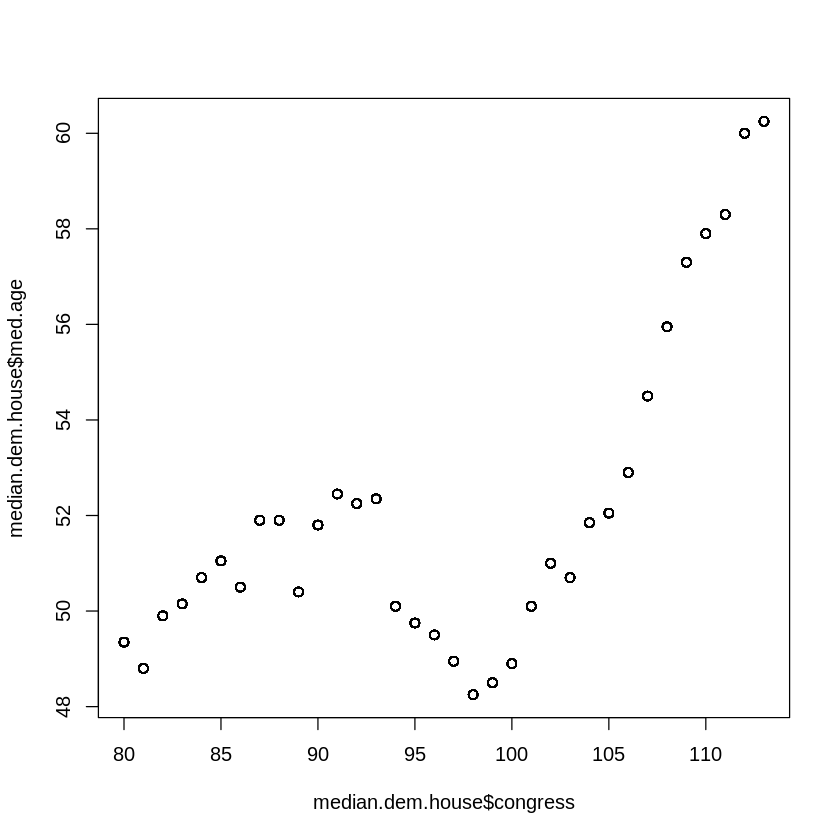

In [35]:
# Exercise 7 code goes here
# -------------------------

plot(median.dem.house$congress, median.dem.house$med.age)

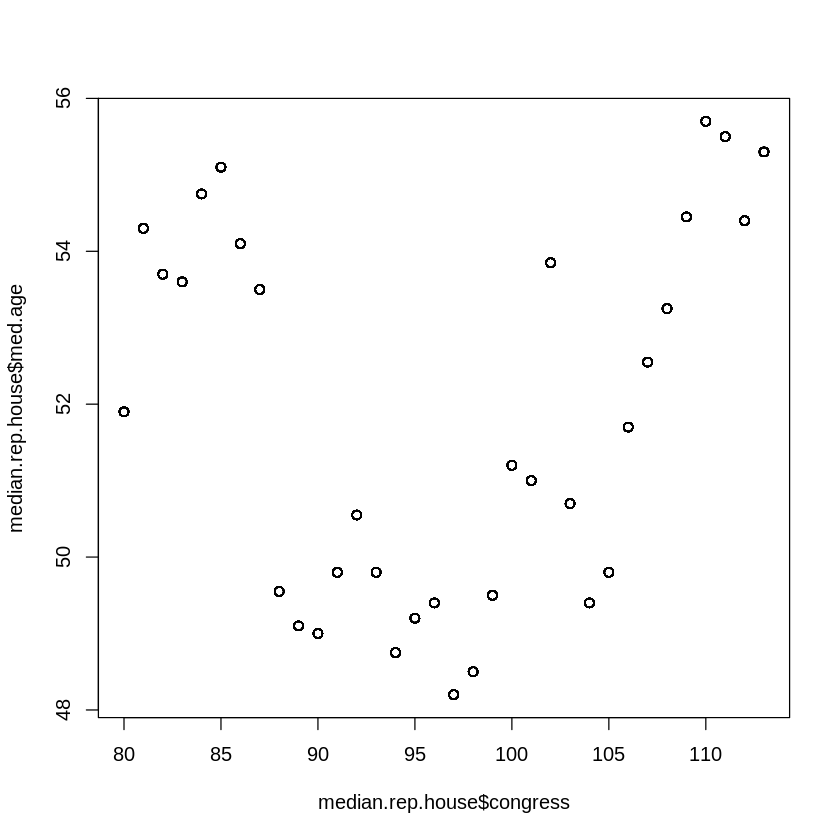

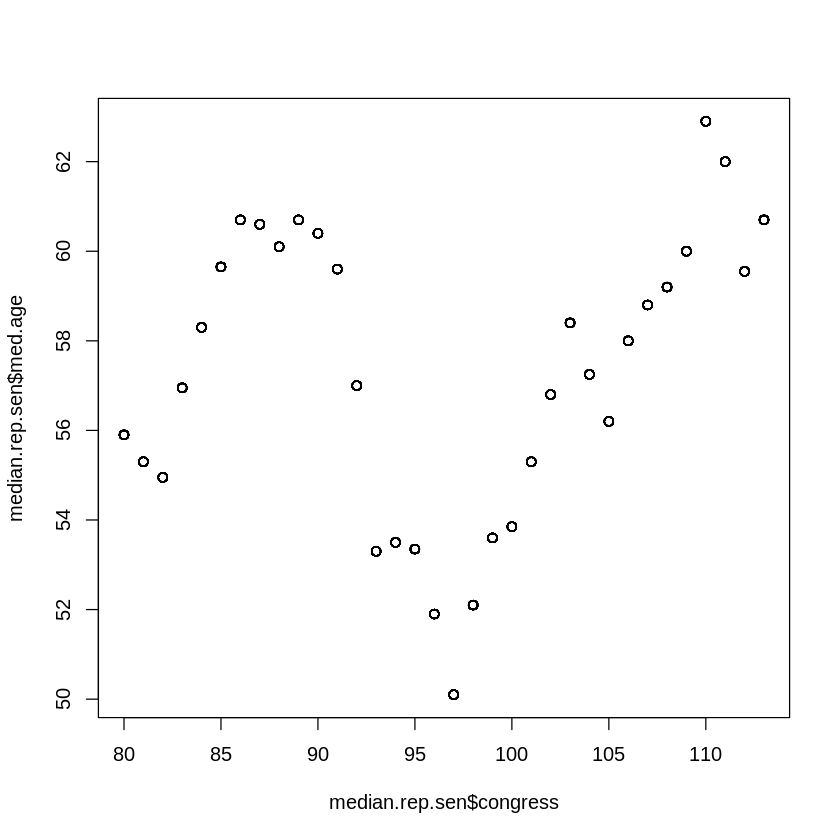

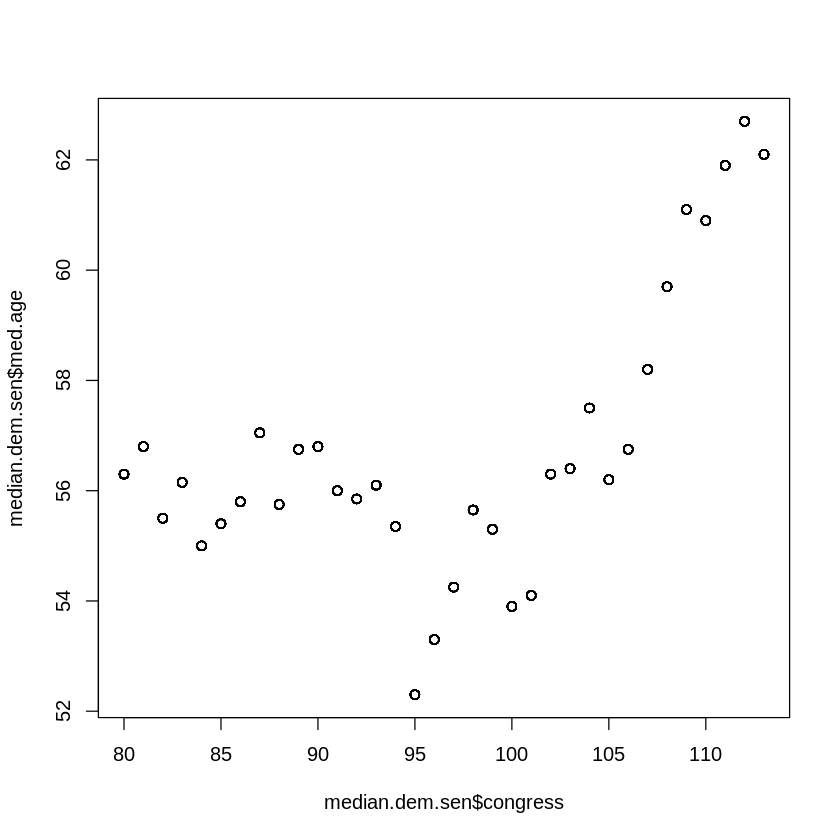

In [36]:
## plotting the others just to see.
## Sure enough, it does look like that one

plot(median.rep.house$congress, median.rep.house$med.age)
plot(median.rep.sen$congress, median.rep.sen$med.age)
plot(median.dem.sen$congress, median.dem.sen$med.age)

# Save your notebook, then `File > Close and Halt`